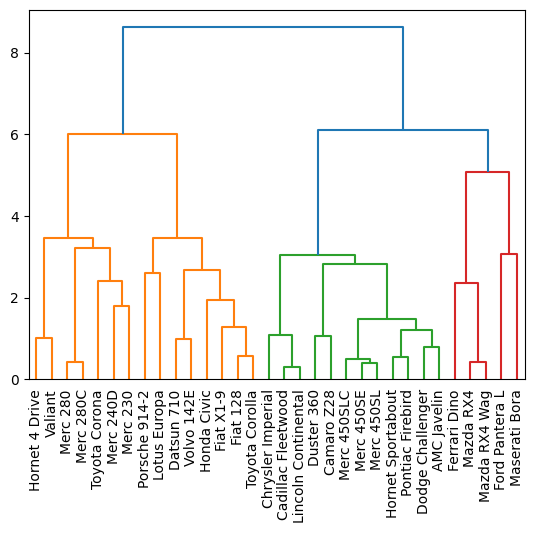

In [39]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

data = pd.read_csv("mtcars.csv")
#print(data.info())
x=data.drop(['model'], axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
car_names = list(data.pop('model'))
#print(car_names)
#иерархическая кластеризация - функция linkage
clusts = linkage(x_scaled, method='complete')

#строим дендрограмму
dendrogram(clusts,
           labels=car_names,
           leaf_rotation=90,
           leaf_font_size=10,
           )

plt.show()



#dbscan


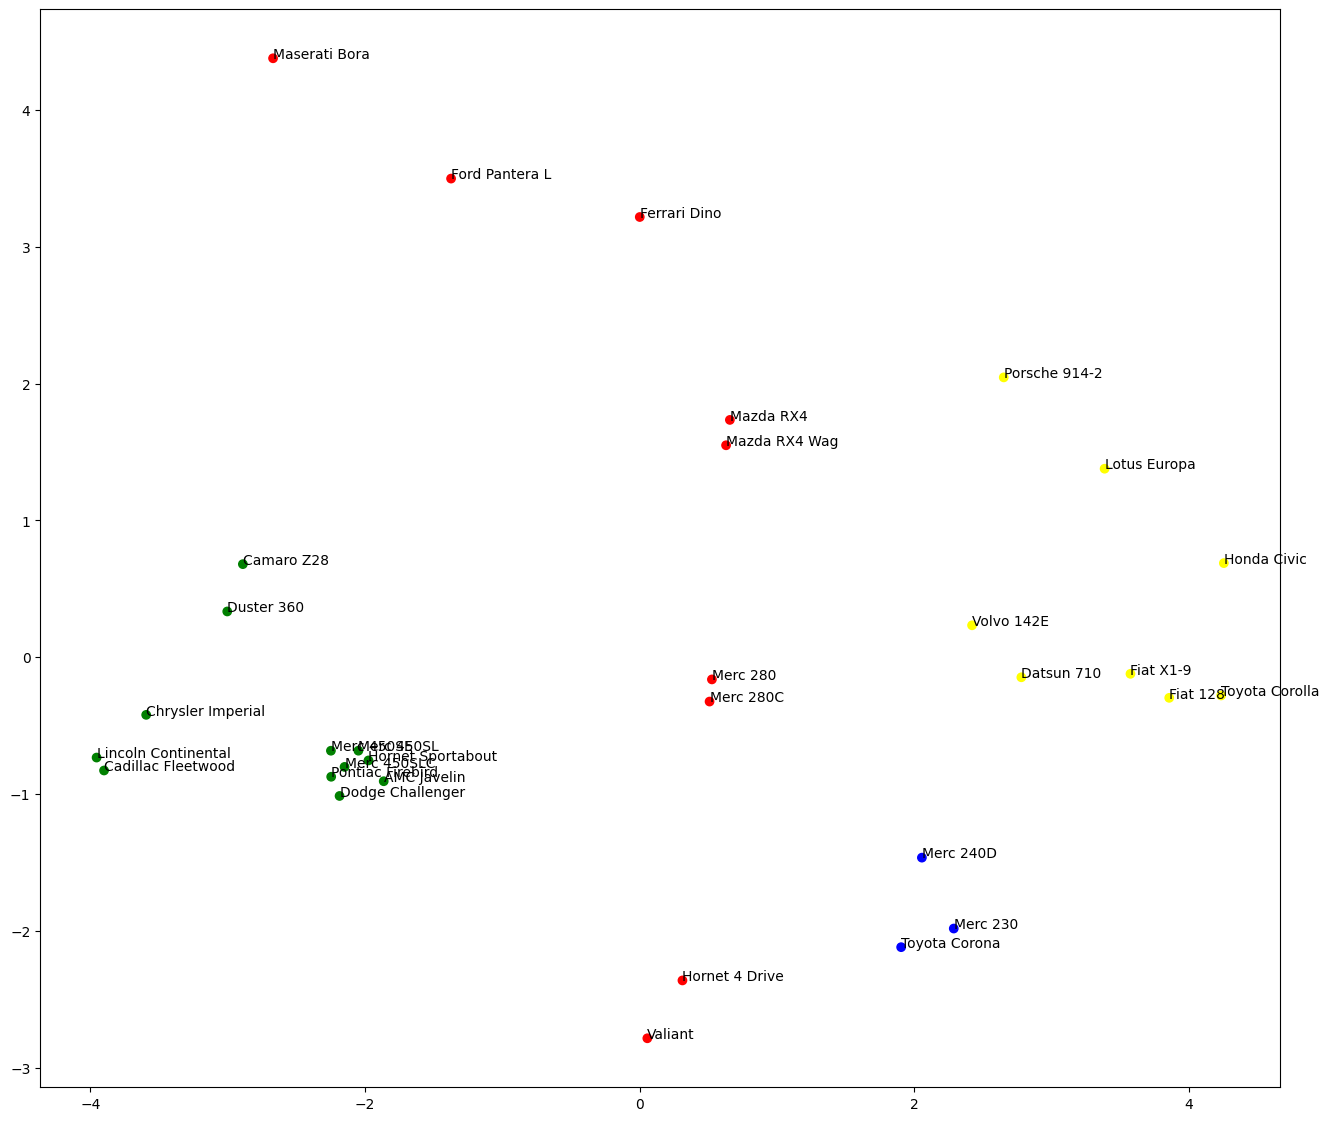

In [46]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("mtcars.csv")
x=data.drop(['model'], axis=1)
car_names = list(data.pop('model'))
#print(car_names)

#стандартизируем данные
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#метод главных компонент для дальнейшей визуализации
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']

dbscan = DBSCAN(eps=1.5, min_samples=3).fit(x_principal)
labels = dbscan.labels_
#print(labels)

data['cluster'] = dbscan.labels_
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(16, 14))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
for i in range(32): plt.annotate(text=car_names[i], xy=(x_principal['V1'][i], x_principal['V2'][i]), xytext=(x_principal['V1'][i], x_principal['V2'][i]))
plt.show()

сверточный автоэнкодер

In [49]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2 as cv


#генерация изображений с помощью ImageDataGenerator библиотеки Keras
def loadData(h, w):
  train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
  train_generator=train_datagen.flow_from_directory('/content/sample_data/data_pic',
                                                  target_size=(w,h),
                                                  color_mode='grayscale',
                                                  batch_size=32,
                                                  class_mode='categorical', shuffle=True)
  return train_generator[0][0]

In [ ]:
loadData(32,32)

In [51]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,  UpSampling2D
from keras import backend as K

batch_size = 2
epochs = 50


h, w = 32, 32
input_shape = (h, w, 1)
y_train = x_train = loadData(h, w)

model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D(size =(2,2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D(size =(2,2)))
model.add(Conv2D(1, (3, 3), activation='linear', padding='same'))


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


print(model.summary())



Found 16 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          1168      
                                                                 
 up_sampling2d (

In [52]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_train, y_train))
score = model.evaluate(x_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
8/8 [==============================] - 2s 45ms/step - loss: 0.2333 - accuracy: 0.0000e+00 - val_loss: 0.1982 - val_accuracy: 0.0000e+00
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.1886 - accuracy: 0.0000e+00 - val_loss: 0.1644 - val_accuracy: 0.0000e+00
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.1547 - accuracy: 0.0000e+00 - val_loss: 0.1380 - val_accuracy: 0.0000e+00
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.1251 - accuracy: 0.0000e+00 - val_loss: 0.1090 - val_accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.1030 - accuracy: 0.0000e+00 - val_loss: 0.0981 - val_accuracy: 0.0000e+00
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0985 - accuracy: 0.0000e+00 - val_loss: 0.0942 - val_accuracy: 0.0000e+00
Epoch 7/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0922 - accuracy: 0.0000e+00 - val_loss: 0.089

In [ ]:
cv.imwrite("pred.jpg",255*model.predict(x_train)[3])
cv.imwrite("x.jpg",255*(x_train)[3])